#Classification Of Fruits

Dataset:Fruits Classification dataset

[ Download](https://www.kaggle.com/mjamilmoughal/k-nearest-neighbor-classifier-to-predict-fruits/data)

This is a Fruits Identification Data Set from keggle. It contains 7 attributes. 

####Q1: Why you want to apply Classification on selected dataset? Discuss full story behind dataset.
Ans: As dataset Contains many Columns such as 'fruit_label', 'fruit_name', 'mass', 'width', 'height', 'color_score'. Among them fruit name Column is one dependent variable.Which
indicates that the 4 different types of fruits.

So here the output or target value will be four differnt types of fruits names. so it is a multi class classification problem.

So here we can use K- nearest neighbour classification for Multiclass class Classification.

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model
structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical
assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data

ModuleNotFoundError: No module named 'numpy'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Now we load our dataset, and we will check it's first five rows to check how our data looks, which features our data have.

In [4]:
fruits = pd.read_table('D:/SEM 6/ML/Practicles/Practicles/Dixit Practicles/4 KNN/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
fruits.shape

(59, 7)

####Q2: How many total observations in data?
Ans: There are total 59 observations in data set.
####Q3: How many independent variables?
Ans: There are total seven columns out of which six columns independent variable.Here, Except 'fruit name' Column all other columns are independent.
####Q4: Which is dependent variable?
Ans: 'fruit name' is dependent variable which is indicating that the four different types of fruits

In [26]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

Dataset have seven columns containing the information about fruits. Here only two fruits i.e apple and mandarin are seen. Every fruit is described with four features i.e 1) mass of fruit 2) width of fruit 3) what is height and 4) what is color score of fruit. Now we have to check how many fruits are present in our data.

In [9]:
#checking how many unique fruit names are present in the dataset
fruits['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

####Q5: Which are most useful variable in estimation? Prove using correlation.
Ans: Here, data has only six independent variable which has linear correlation with dependent variable.

If there are more than one independent variable, not all independent variables contributes equally in estimation of dependent variable. This can be quatified
using correlation between dependent and independent variable.

corr function is sklearn can be used to find correlation between variables. We can find correlation of each independent variable with dependent vatiable using
loop, store them in a list/dataframe, sort them and finally decide which varible to use in delveloping mode

In [28]:
fruits.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


We have seen that the dataset contains four unique fruits. apple with 19 entries, orange with 19 entries, lemon with 16 entries and mandarin with 5 entries.

Now we will store all unique data on four different dataframes.



In [0]:
apple_data=fruits[fruits['fruit_name']=='apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']


In [22]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [23]:
mandarin_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


In [24]:
orange_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


In [25]:
lemon_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72


By looking above data, it is shown that for every fruit there is a fruit_label. For apple it is 1, for mandarin it is 2, for orange it is 3 and for lemon it is 4. Now we will visualize this data on plots for further exploration.

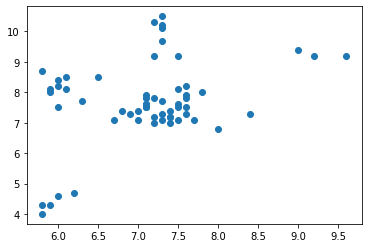

In [11]:
plt.scatter(fruits['width'],fruits['height'])

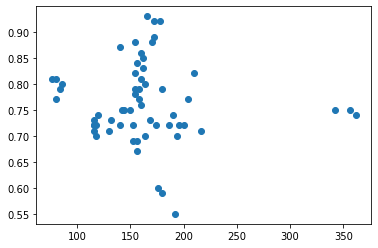

In [12]:
plt.scatter(fruits['mass'],fruits['color_score'])

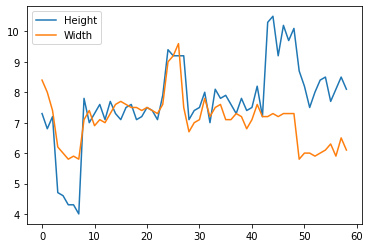

In [13]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

Now we will use K-Nearest Neighbors classifier to predict a new record on the basis of this data. For this we will aplit this dataset into test and train sets. First we will import sklearn library for our model.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

Now we will create a KNN classifier for making predictions.

In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
y_pred=knn.fit(X_train,y_train).predict(X_test)
print("KNeighbors accuracy score :",accuracy_score(y_test,y_pred))

KNeighbors accuracy score : 0.5333333333333333


We can check the accuracy of our classifier

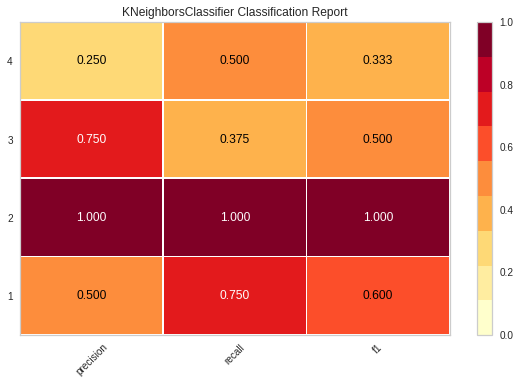

In [17]:
visualizer = ClassificationReport(knn, classes=['1','2','3','4'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

In [21]:
knn1=KNeighborsClassifier(n_neighbors=1)
y_pred=knn1.fit(X_train,y_train).predict(X_test)
print("KNeighbors accuracy score :",accuracy_score(y_test,y_pred))

KNeighbors accuracy score : 0.6


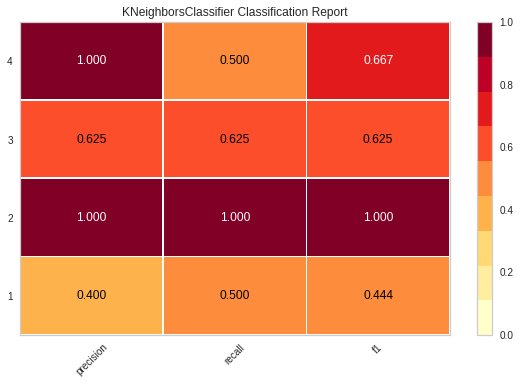

In [23]:
visualizer = ClassificationReport(knn1, classes=['1','2','3','4'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

Now we can make predictions with new data as following:

In [27]:
#parameters of following function are mass,width and height
#example1
prediction1=knn.predict([['100','6.3','8']])
predct[prediction1[0]]

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


'lemon'

In [28]:
#example2
prediction2=knn.predict([['300','7','10']])
predct[prediction2[0]]

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:605: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')


'orange'

Yes, our model is running successfully and making accurate predictions.

####Q7: Can we use KNN for regression also? Why / Why not?
Ans: KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new
data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. From our example, we know that
ID11 has height and age similar to ID1 and ID5, so the weight would also approximately be the same.
####Q8: Discuss drawbacks of algorithms such as KNN.
Ans: The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire
training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors.
Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for
large dimensional data.